# Read in the data from Charles El Mir and output to "raw"

*The data are from [this article](https://www.sciencedirect.com/science/article/pii/S001910351830349X?via%3Dihub).*

*I will have to downsample considerably...*


In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import os
import csv

from matplotlib import pyplot as plt
from matplotlib import animation
from ipywidgets import *

### Get the total number of objects in all files

*The number of particles decreases as the time increases, but it's always around 1M.  We want about 1M objects total.  So the fraction that we will use in each file is about 1/Nfiles.*

In [2]:
fs = os.listdir()
files = []
nfiles = 0
for f in fs:
    if ('csv' in f):
        files.append(f)
#print(files)
nfiles = len(files)
frac = 2./nfiles #* 0.1 #to speed up everything for testing
print(frac)        


0.014925373134328358


### Grab a list of IDs from the first file

In [3]:
f = 'grav.000000000.csv'
df = pd.read_csv(f, header=None, names=['ID','x','y','z','color','damage'])
time = float(f[5:14])
df['time'] = time
dfSample = df.sample(frac=frac)
print(dfSample.shape)
print(dfSample)

(15177, 7)
              ID             x             y             z  color    damage  \
735193  735193.0   1100.001172   6300.006713  10900.011614    5.0  0.167096   
445079  445079.0  -1300.001385    300.000320  -8500.009057    3.0  0.144228   
804264  804264.0   7900.008417  -4300.004582   5900.006286    3.0  0.129178   
954309  954309.0   7900.008417   9100.009696  -4300.004582    2.0  0.200000   
471986  471986.0   3100.003303   -700.000746  -5100.005434    5.0  0.157274   
233219  233219.0  -6700.007139   4100.004368  -1500.001598    3.0  0.128554   
222912  222912.0  -5700.006073   5900.006286  -3900.004155    2.0  0.200000   
403403  403403.0  -1300.001385  -7700.008204   7700.008204    3.0  0.130842   
922267  922267.0   5700.006073  -1900.002024   6100.006499    5.0  0.152428   
640848  640848.0   1300.001385   8300.008843  -4700.005008    5.0  0.158024   
165965  165965.0  -8500.009057  -1900.002024   3500.003729    3.0  0.134144   
579103  579103.0   -300.000320   -900.000

### Read through all the files, and only keep the rows that match these IDs

In [ ]:
dfOut = dfSample.copy()
for i,f in enumerate(files):
    if (i > 0):
        df = pd.read_csv(f, header=None, names=['ID','x','y','z','color','damage'])
        time = float(f[5:14])
        df['time'] = time
        dfUse = df.loc[df['ID'].isin(dfSample['ID'].values)] 
        dfOut = dfOut.append(dfUse, ignore_index=True)
        print(f, dfOut.shape, dfUse.shape)

grav.000001000.csv (30335, 7) (15158, 7)
grav.000002000.csv (45477, 7) (15142, 7)
grav.000003000.csv (60594, 7) (15117, 7)
grav.000004000.csv (75687, 7) (15093, 7)
grav.000005000.csv (90751, 7) (15064, 7)
grav.000006000.csv (105782, 7) (15031, 7)
grav.000007000.csv (120763, 7) (14981, 7)
grav.000008000.csv (135677, 7) (14914, 7)
grav.000009000.csv (150523, 7) (14846, 7)
grav.000010000.csv (165260, 7) (14737, 7)
grav.000011000.csv (179904, 7) (14644, 7)
grav.000012000.csv (194455, 7) (14551, 7)
grav.000013000.csv (208899, 7) (14444, 7)
grav.000014000.csv (223235, 7) (14336, 7)
grav.000015000.csv (237479, 7) (14244, 7)
grav.000016000.csv (251642, 7) (14163, 7)
grav.000017000.csv (265720, 7) (14078, 7)
grav.000018000.csv (279715, 7) (13995, 7)
grav.000019000.csv (293639, 7) (13924, 7)
grav.000020000.csv (307505, 7) (13866, 7)
grav.000021000.csv (321301, 7) (13796, 7)
grav.000022000.csv (335041, 7) (13740, 7)
grav.000023000.csv (348729, 7) (13688, 7)
grav.000024000.csv (362378, 7) (13649, 

## Write to "raw" file

*This is extremely slow because I want to match the IDs*

In [ ]:
dt = 1000.
csvfile = open("asteroid.raw", 'wt')
csvwriter = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
for i in range(len(dfOut['ID'])):
    ID = dfOut['ID'].values[i]
    sameID = dfOut.loc[(dfOut['ID'] == ID) & (dfOut.index > i)]
    r,c = sameID.shape

    if (r > 0):
        if (dfOut['time'].values[i] - sameID['time'].values[0] <= dt):
            csvwriter.writerow([dfOut['x'].values[i],dfOut['y'].values[i],dfOut['z'].values[i], 
                            sameID['x'].values[0],sameID['y'].values[0],sameID['z'].values[0],
                            dfOut['time'].values[i], dfOut['damage'].values[i], dfOut['ID'].values[i]])
csvfile.close()

## Plot the files

<IPython.core.display.Javascript object>


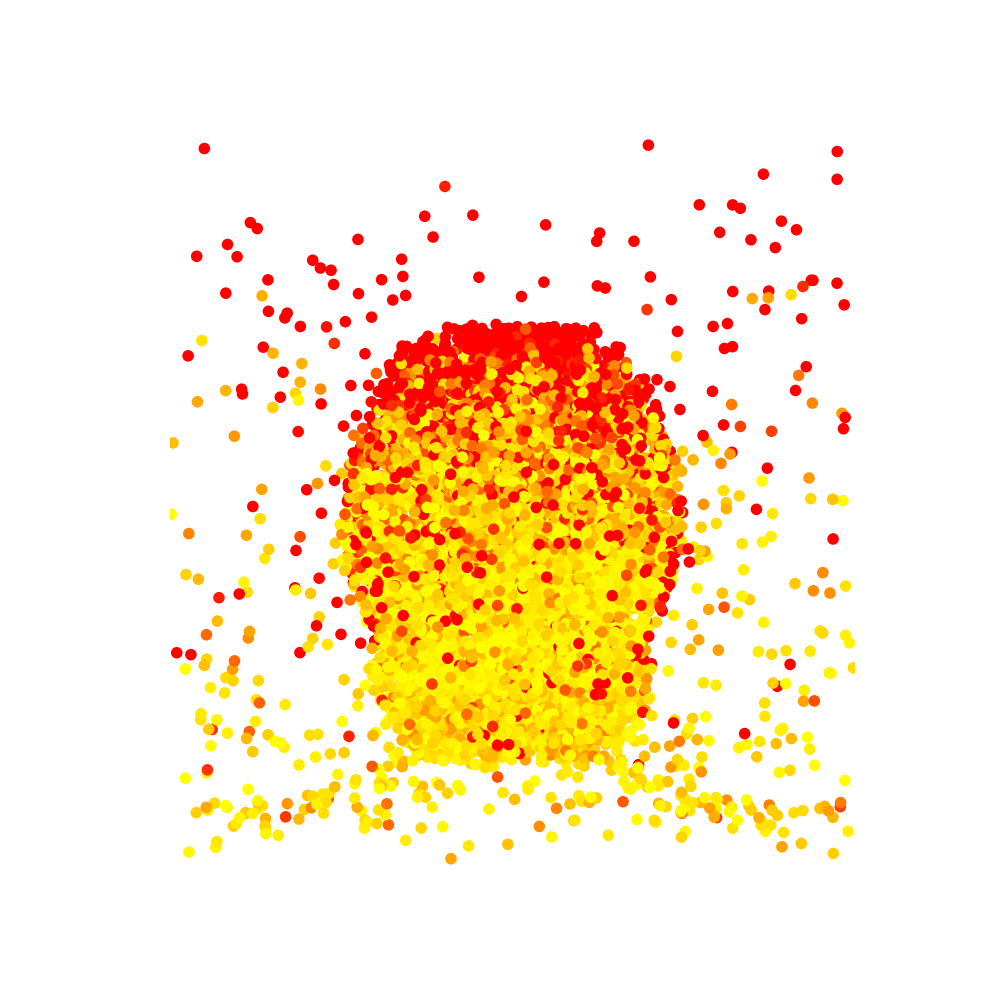

interactive(children=(FloatSlider(value=0.0, description='t', max=92000.0), Output()), _dom_classes=('widget-i…

<function __main__.update_plot(t=0)>

In [5]:
df = pd.read_csv('../data/asteroid.raw', delimiter=' ', header=None, names=['x1','y1','z1','x2','y2','z2','time','damage','id'])
times = np.sort(np.array(list(set(df['time'].values))))
dt = np.diff(times)[0]
#print(times)
#print(dt)

dfUse = df.loc[df['time'].values == times[0]]

fig,ax = plt.subplots(figsize=(5,5))
scat = ax.scatter(dfUse['x1'].values, dfUse['y1'].values, s=10, 
                c=dfUse['damage'].values, cmap='autumn_r', vmin=0.125, vmax = 0.2)
ax.set_xlim(-20000, 20000)
ax.set_ylim(-25000, 20000)
ax.set_aspect('equal')
plt.axis('off')


def update_plot(t=0):
    
    tFrac = (t % dt)/dt
    dfUse = df.loc[(df['time'].values >= t) & (df['time'].values < t+dt)]
    x = dfUse['x1'].values + (dfUse['x2'].values - dfUse['x1'].values)*tFrac
    y = dfUse['y1'].values + (dfUse['y2'].values - dfUse['y1'].values)*tFrac
    # Change the colors.
    scat.set_array(dfUse['damage'].values)
    # Change the x,y positions. This expects a _single_ 2xN, 2D array
    scat.set_offsets(np.c_[x,y])
    #fig.canvas.draw()
    return scat,

interact(update_plot, t = widgets.FloatSlider(value=0, min=min(times),max=max(times),step=0.1))



0.12500013739700003 0.2


<IPython.core.display.Javascript object>


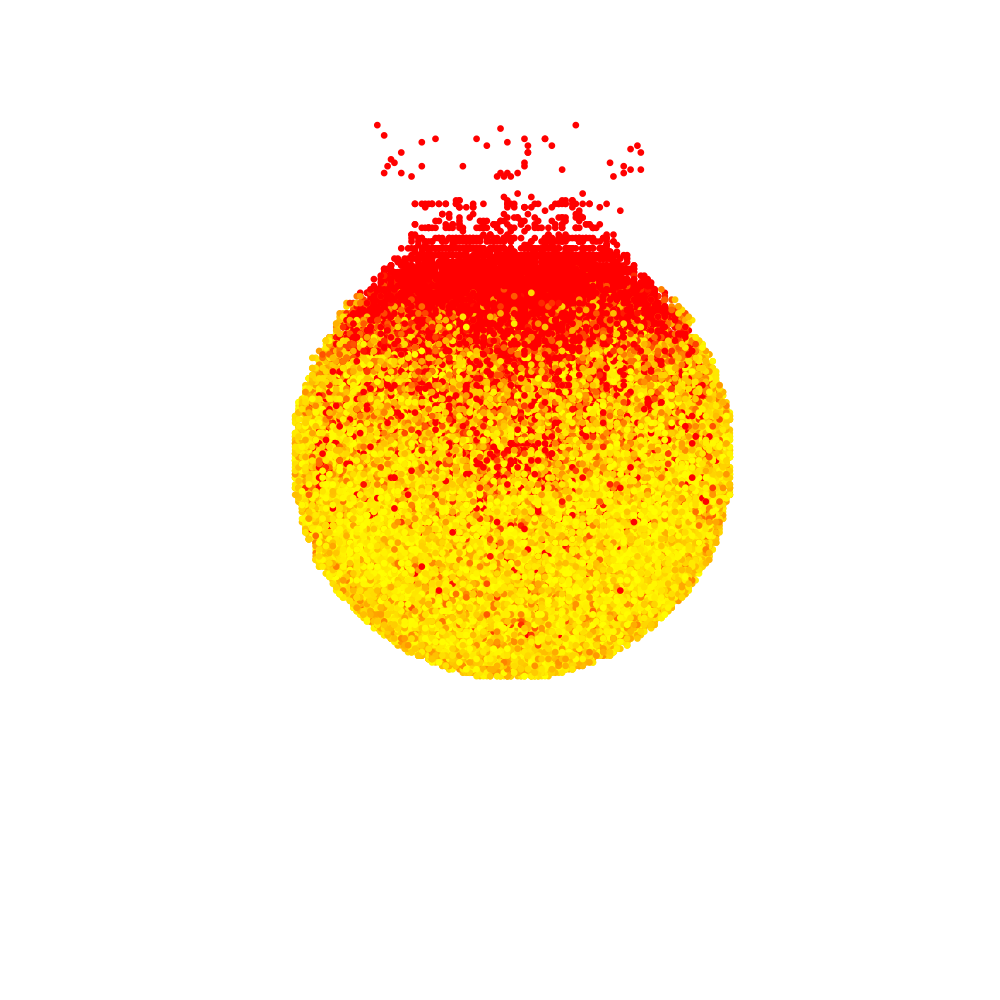

(-20000.0, 20000.0, -25000.0, 20000.0)

In [7]:
i=0
f = files[i]
#f = 'grav.000000000.csv'
#f = 'grav.000092000.csv'
df = pd.read_csv(f, header=None, names=['ID','x','y','z','color','damage'])
dfUse = df.sample(frac = 0.1)
print(min(dfUse['damage'].values), max(dfUse['damage'].values))
fig,ax = plt.subplots(figsize=(5,5))
scat = ax.scatter(dfUse['x'].values, dfUse['y'].values, s=2, 
                  c=dfUse['damage'].values, cmap='autumn_r', vmin=0.125, vmax = 0.2)
ax.set_xlim(-20000, 20000)
ax.set_ylim(-25000, 20000)
ax.set_aspect('equal')
ax.axis('off')